# **Visualizing and Analyzing the Data**

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Read the Dataset

In [4]:
df = pd.read_csv('/content/garments_worker_productivity.csv')
df.head()  # Optional: Shows first 5 rows


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Correlation Analysis

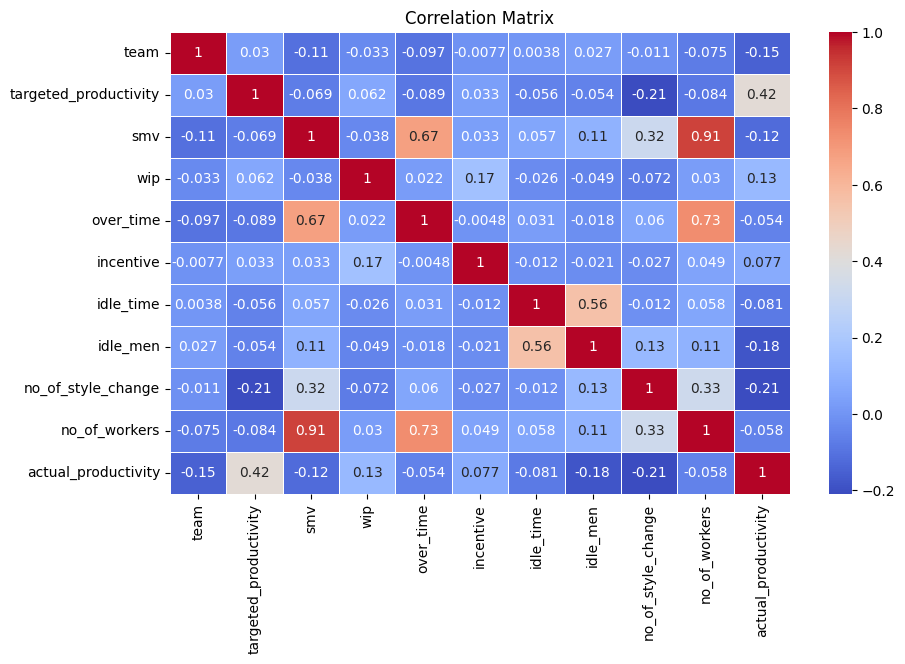

In [5]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Descriptive Analysis

In [6]:
df.describe()  # For numeric summary

# Optional (for categorical columns)
print(df['department'].value_counts())
print(df['day'].value_counts())


department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64
day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64


# **Data Pre-processing**

## Checking for null values

In [7]:
print("Shape of the dataset:", df.shape)
df.info()
print("\nMissing values in each column:")
print(df.isnull().sum())


Shape of the dataset: (1197, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    

## Handling Date & Department

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df.drop(['date'], axis=1, inplace=True)

df.head()  # ✅ OPTIONAL: Just to view updated data


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1


## Handling Categorical Values

In [9]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['quarter', 'department', 'day']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df[cat_cols].head()  # Optional: check encoded output


,quarter,department,day
0,0,2,3
1,0,1,3
2,0,2,3
3,0,2,3
4,0,2,3


## Splitting data into train and test

In [10]:
from sklearn.model_selection import train_test_split

# Features (X) = all columns except target
X = df.drop('actual_productivity', axis=1)

# Target (y) = what we want to predict
y = df['actual_productivity']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (957, 14)
X_test shape: (240, 14)


# **Model Building**

## Linear Regression

X_train shape: (957, 14)
X_test shape: (240, 14)

📊 Linear Regression Evaluation (after imputation):
MAE: 0.1073
MSE: 0.0215
R² Score: 0.19


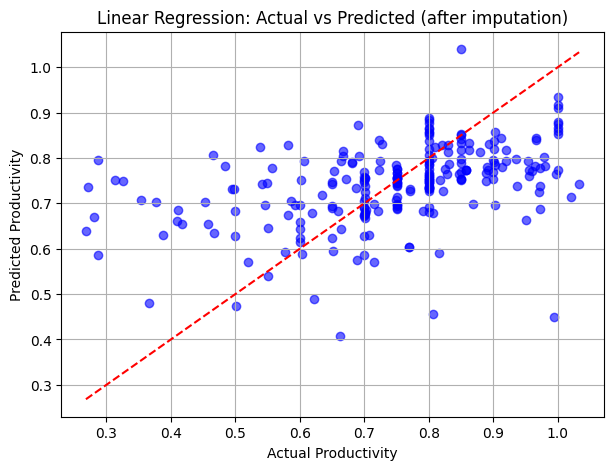

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Features (X) = all columns except target
X = df.drop('actual_productivity', axis=1)

# Target (y) = what we want to predict
y = df['actual_productivity']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# --- Model Building ---

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd


model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

pred_test = model_lr.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2 = r2_score(y_test, pred_test)

# Print results
print("\n📊 Linear Regression Evaluation (after imputation):") # Added note about imputation
print("MAE:", round(mae, 4))
print("MSE:", round(mse, 4))
print("R² Score:", round(r2, 4))

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(7, 5))
plt.scatter(y_test, pred_test, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Linear Regression: Actual vs Predicted (after imputation)")
plt.grid(True)
plt.show()

## Random Forest Model


📊 Random Forest Evaluation:
MAE: 0.0683
MSE: 0.0118
R² Score: 0.5559


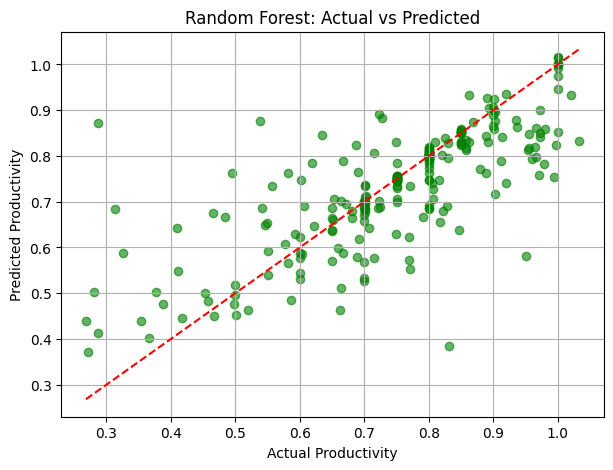

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Initialize the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train the model
model_rf.fit(X_train, y_train)

# 3. Make predictions
pred_rf = model_rf.predict(X_test)

# 4. Evaluation metrics
mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

# 5. Print results
print("\n📊 Random Forest Evaluation:")
print("MAE:", round(mae_rf, 4))
print("MSE:", round(mse_rf, 4))
print("R² Score:", round(r2_rf, 4))

# 6. Scatter plot with reference line
plt.figure(figsize=(7, 5))
plt.scatter(y_test, pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.show()


## Xgboost Model


📊 XGBoost Evaluation:
MAE: 0.0705
MSE: 0.0129
R² Score: 0.5155


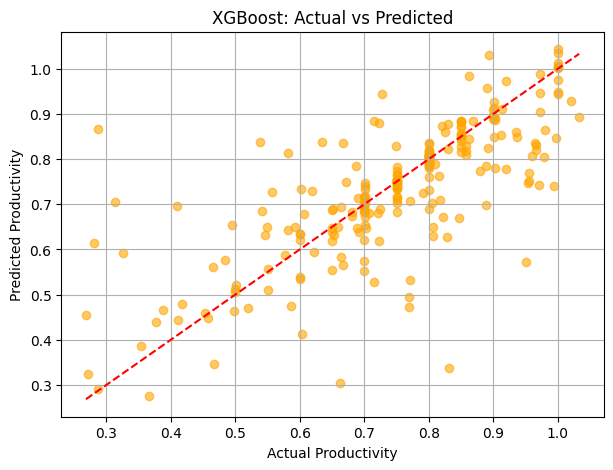

In [13]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Initialize the XGBoost Regressor
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# 2. Train the model
model_xgb.fit(X_train, y_train)

# 3. Predict on test data
pred3 = model_xgb.predict(X_test)

# 4. Evaluation metrics
mae_xgb = mean_absolute_error(y_test, pred3)
mse_xgb = mean_squared_error(y_test, pred3)
r2_xgb = r2_score(y_test, pred3)

# 5. Print results
print("\n📊 XGBoost Evaluation:")
print("MAE:", round(mae_xgb, 4))
print("MSE:", round(mse_xgb, 4))
print("R² Score:", round(r2_xgb, 4))

# 6. Scatter plot: Actual vs Predicted
plt.figure(figsize=(7, 5))
plt.scatter(y_test, pred3, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)
plt.show()


## Compare the Model

In [14]:
# Create a summary dictionary
results = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE": [round(mae, 4), round(mae_rf, 4), round(mae_xgb, 4)],
    "MSE": [round(mse, 4), round(mse_rf, 4), round(mse_xgb, 4)],
    "R² Score": [round(r2, 4), round(r2_rf, 4), round(r2_xgb, 4)]
}

# Convert to DataFrame for clean display
import pandas as pd
comparison_df = pd.DataFrame(results)

# Display the comparison table
print("\n📊 Model Comparison Results:")
print(comparison_df)



📊 Model Comparison Results:
               Model     MAE     MSE  R² Score
0  Linear Regression  0.1073  0.0215    0.1900
1      Random Forest  0.0683  0.0118    0.5559
2            XGBoost  0.0705  0.0129    0.5155


## Evaluating performance of the model and saving the model

In [15]:
import pickle

# Save the trained XGBoost model to a file named 'gwp.pkl'
with open('gwp.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)

print("✅ XGBoost model saved successfully as 'gwp.pkl'")


✅ XGBoost model saved successfully as 'gwp.pkl'


In [16]:
from google.colab import files
files.download('gwp.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Web Page**

In [ ]:
import gradio as gr
import pickle
import numpy as np

# Load the model
model = pickle.load(open("gwp.pkl", "rb"))

# Mappings for dropdowns
day_map = {
    "Sunday": 0, "Monday": 1, "Tuesday": 2,
    "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6
}

department_map = {
    "Finishing": 0,
    "Sewing": 1
}

quarter_map = {
    "Q1": 0,
    "Q2": 1,
    "Q3": 2,
    "Q4": 3
}

# Prediction function (NO scenario tags)
def predict_performance(quarter_label, department_label, day_label, team, targeted_productivity, smv, wip,
                        over_time, incentive, idle_time, idle_men,
                        no_of_style_change, no_of_workers, month):

    quarter = quarter_map[quarter_label]
    department = department_map[department_label]
    day = day_map[day_label]

    input_data = np.array([[quarter, department, day, team, targeted_productivity, smv, wip,
                            over_time, incentive, idle_time, idle_men,
                            no_of_style_change, no_of_workers, month]])

    prediction = round(model.predict(input_data)[0], 2)

    # Color-coded output
    if prediction >= 0.8:
        color = "green"
        status = "Excellent Productivity"
        suggestion = "✅ No immediate action needed."
    elif prediction >= 0.6:
        color = "orange"
        status = "Moderate Productivity"
        suggestion = "🔍 Monitor performance or offer guidance."
    else:
        color = "red"
        status = "Low Productivity – Needs Improvement"
        suggestion = "🛠️ Suggest training, support, or reassignment."

    return f"""
    <span style='color:{color}; font-weight:bold; font-size:22px;'>
    🧠 Predicted Productivity: {prediction} ({status})</span><br>
    <span style='font-size:18px;'>{suggestion}</span>
    """

# Gradio Interface
interface = gr.Interface(
    fn=predict_performance,
    inputs=[
        gr.Dropdown(label="Quarter", choices=list(quarter_map.keys())),
        gr.Dropdown(label="Department", choices=list(department_map.keys())),
        gr.Dropdown(label="Day", choices=list(day_map.keys())),
        gr.Number(label="Team", minimum=1, maximum=12),
        gr.Number(label="Targeted Productivity", minimum=0.0, maximum=1.0, step=0.05),
        gr.Number(label="SMV", minimum=5.0, maximum=100.0),
        gr.Number(label="WIP", minimum=0, maximum=1200),
        gr.Number(label="Over Time (mins)", minimum=0, maximum=1500),
        gr.Number(label="Incentive", minimum=0, maximum=300),
        gr.Number(label="Idle Time", minimum=0, maximum=400),
        gr.Number(label="Idle Men", minimum=0, maximum=10),
        gr.Number(label="No. of Style Change", minimum=0, maximum=5),
        gr.Number(label="No. of Workers", minimum=4, maximum=90),
        gr.Number(label="Month (1–12)", minimum=1, maximum=12),
    ],
    outputs=gr.HTML(label="Prediction Result"),
    title="👔 Employee Productivity Predictor",
    description="Enter task details to predict employee productivity using an XGBoost model. Smart suggestions included."
)

interface.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://5b06fbd5725ceda0a8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
